## PROJECT 2

#### Context
Heart disease is broad term used for diseases and conditions affecting the heart and circulatory system. They are also referred as cardiovascular diseases. It is a major cause of disability all around the world. 

There are several different types and forms of heart diseases. In this dataset is listed various heart diseases associated to different features. 

#### Goal
Detecting the probability of person that will be affected by a heart problem or not.

#### Libraries

In [58]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
# import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,mean_absolute_error, mean_squared_error, r2_score
# To preprocess the data
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# import warnings
import warnings
warnings.filterwarnings('ignore')

#### Dataset

Link: https://www.kaggle.com/datasets/belsonraja/heart-disease-prediction/data

Dictionary of the terms used in the dataset:

- age: age in years
- sex: sex [1 = male, 0 = female]
- cp: chest pain type [Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic]
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) [1 = true; 0 = false]
- restecg: resting electrocardiographic results [Value 0: normal, Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- thalach: maximum heart rate achieved
- exang: exercise induced angina [1 = yes, 0 = no]
- oldpeak = ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment [Value 0: upsloping, Value 1: flat, Value 2: downsloping]
- ca: number of major vessels (0-3) colored by flourosopy
- thal: [0 = error (in the original dataset 0 maps to NaN's), 1 = fixed defect, 2 = normal, 3 = reversable defect]
- target (the lable): [0 = no disease, 1 = disease]

In [6]:
# load the data
df = pd.read_csv('C:/Users/Sandra/Documents/Cursos/MLZoomcamp2024/Capstone_1_Project/heart_data.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.shape
print(f"There are {df.shape[0]} patients and {df.shape[1]} features in the dataset.")

There are 303 patients and 14 features in the dataset.


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### EDA

#### Exploring columns

OBSERVATION: 
---
Max age of the patient: 77
Min age of the patient: 29
So, the age of the patient is between 29 and 77


Text(0.5, 1.0, 'Distribution of Age')

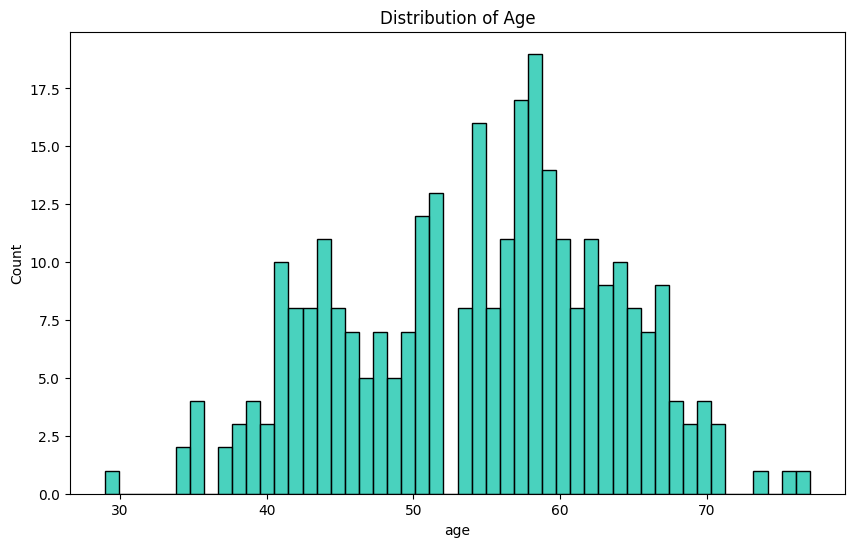

In [17]:
max_age= df['age'].max()
min_age= df['age'].min()
print("Observation: ".upper())
print("---")
print(f"Max age of the patient: {max_age}")
print(f'Min age of the patient: {min_age}')
print(f"So, the age of the patient is between {min_age} and {max_age}")

# plot
plt.figure(figsize=(10,6))
sns.histplot(df['age'], color='#0cc4a9', bins=50)
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Chest Pain Type')

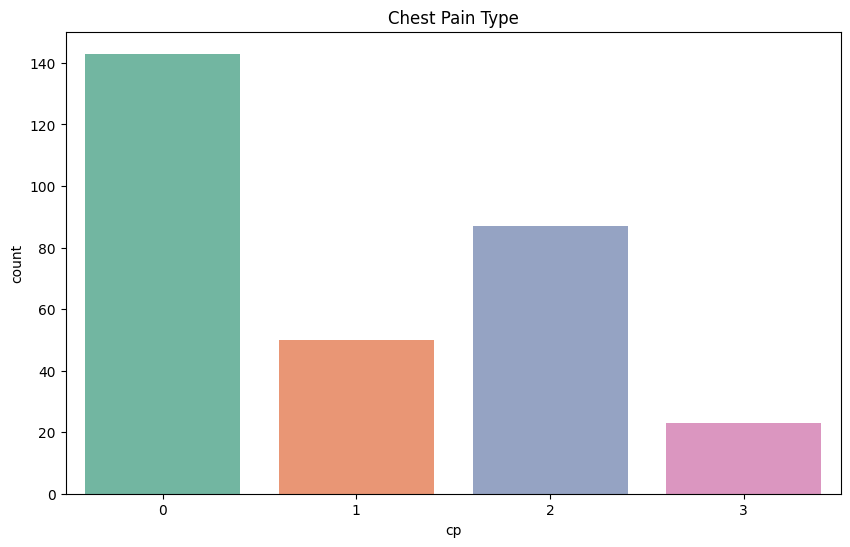

In [16]:
df['cp'].value_counts()

# plot
plt.figure(figsize=(10,6))
sns.countplot(x='cp',data=df, palette='Set2')
plt.title('Chest Pain Type')

OBSERVATION: 
---
Max trestbps of the patient: 200
Min trestbps of the patient: 94


Text(0.5, 1.0, 'Resting Blood Pressure')

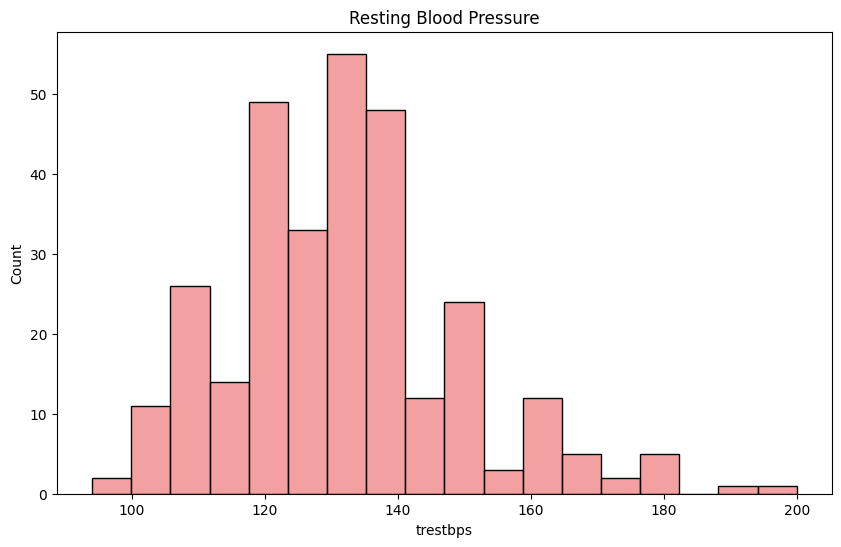

In [18]:
max_trestbps = df['trestbps'].max()
min_trestbps= df['trestbps'].min()
print("Observation: ".upper())
print("---")
print(f"Max trestbps of the patient: {max_trestbps}")
print(f'Min trestbps of the patient: {min_trestbps}')

# plot
plt.figure(figsize=(10,6))
sns.histplot(df['trestbps'], color='lightcoral')
plt.title('Resting Blood Pressure')

OBSERVATION: 
---
Max Cholestrol of the patient: 564
Min Cholestrol of the patient: 126


Text(0.5, 1.0, 'Cholestrol')

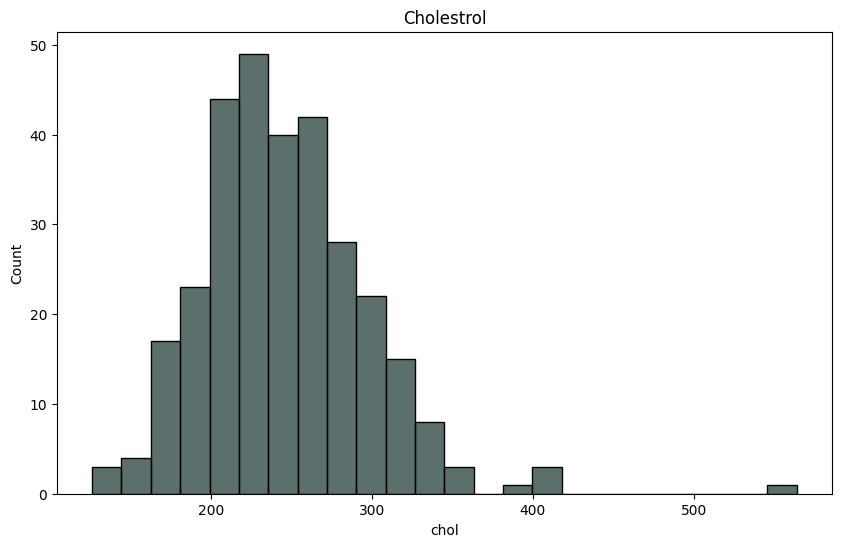

In [19]:
max_chol = df['chol'].max()
min_chol= df['chol'].min()
print("Observation: ".upper())
print("---")
print(f"Max Cholestrol of the patient: {max_chol}")
print(f'Min Cholestrol of the patient: {min_chol}')

#plot
plt.figure(figsize=(10,6))
sns.histplot(df['chol'], color='#24403c')
plt.title('Cholestrol')

Text(0.5, 1.0, 'Fasting Blood Sugar')

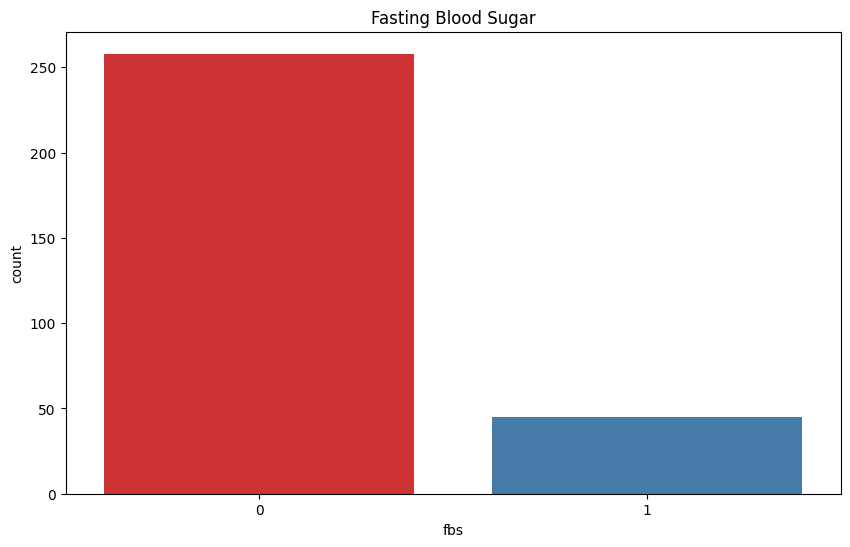

In [20]:
df['fbs'].value_counts()

# plot
plt.figure(figsize=(10,6))
sns.countplot(x='fbs',data=df, palette='Set1')
plt.title('Fasting Blood Sugar')

Text(0.5, 1.0, 'Resting Electrocardiographic Results')

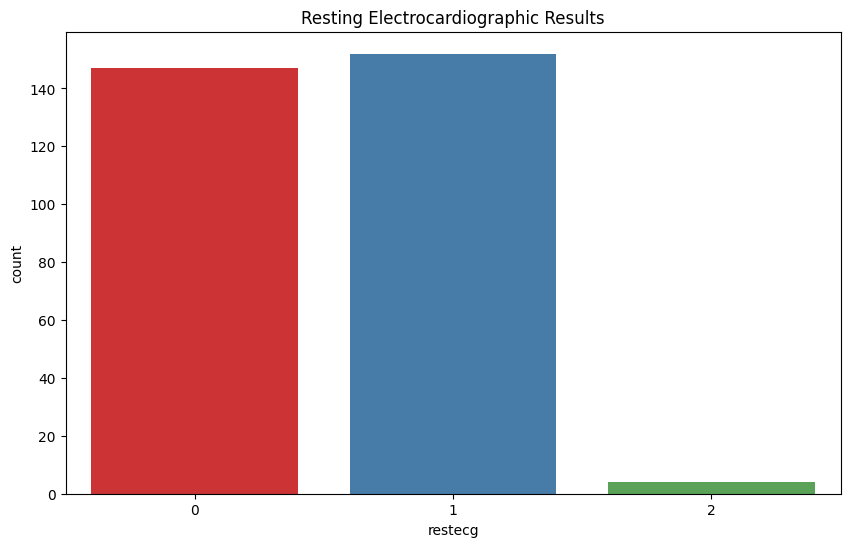

In [21]:
df['restecg'].value_counts()

# plot
plt.figure(figsize=(10,6))
sns.countplot(x='restecg',data=df, palette='Set1')
plt.title('Resting Electrocardiographic Results')

OBSERVATION: 
---
Max heart rate of the patient: 202
Min heart rate of the patient: 71


Text(0.5, 1.0, 'Maximum Heart Rate Achieved')

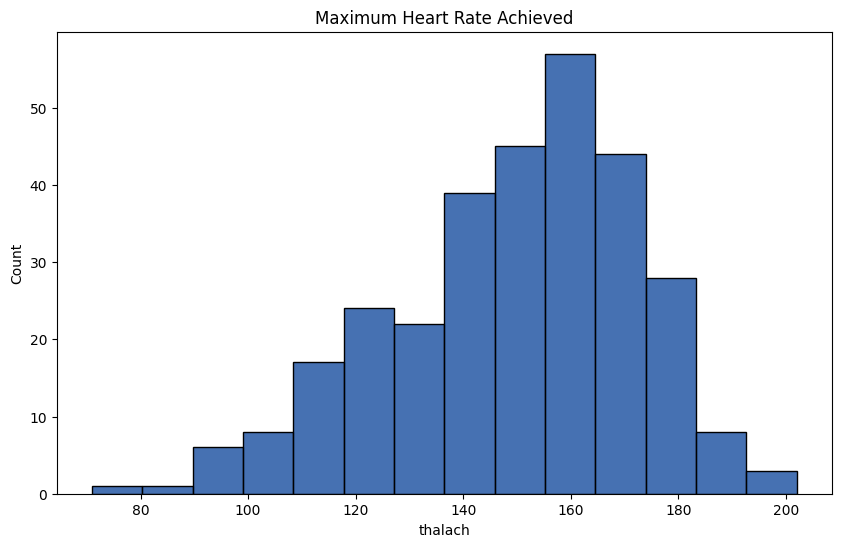

In [23]:
max_thalach = df['thalach'].max()
min_thalach= df['thalach'].min()
print("Observation: ".upper())
print("---")
print(f"Max heart rate of the patient: {max_thalach}")
print(f'Min heart rate of the patient: {min_thalach}')

# plot
plt.figure(figsize=(10,6))
sns.histplot(df['thalach'], color='#084299')
plt.title('Maximum Heart Rate Achieved')

Text(0.5, 1.0, 'Exercise Induced Angina')

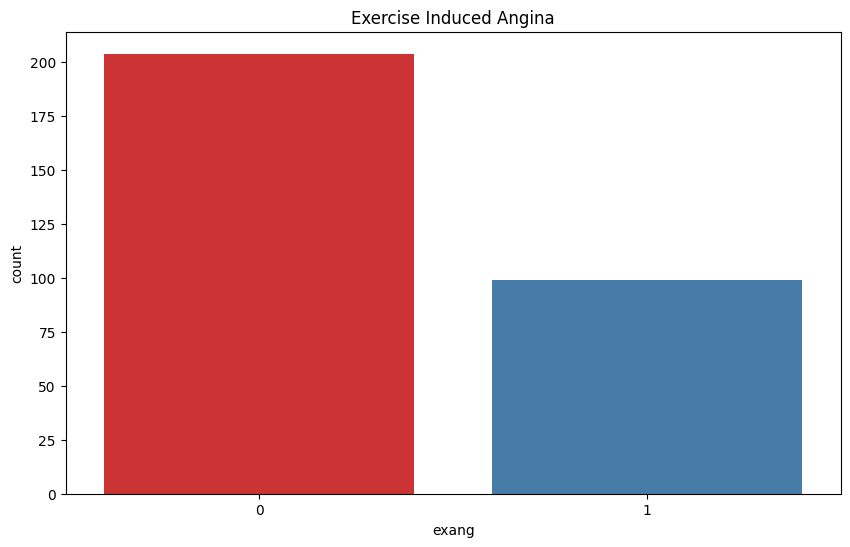

In [24]:
df['exang'].value_counts()

# plot
plt.figure(figsize=(10,6))
sns.countplot(x='exang',data=df, palette='Set1')
plt.title('Exercise Induced Angina')

OBSERVATION: 
---
Max oldpeak of the patient: 6.2
Min oldpeak of the patient: 0.0


Text(0.5, 1.0, 'ST Depression Induced by Exercise Relative to Rest')

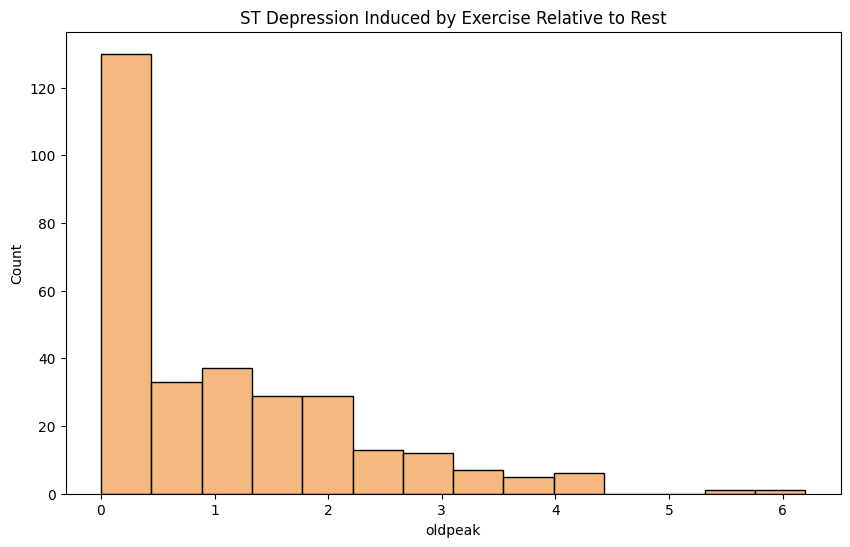

In [25]:
max_oldpeak= df['oldpeak'].max()
min_oldpeak= df['oldpeak'].min()
print("Observation: ".upper())
print("---")
print(f"Max oldpeak of the patient: {max_oldpeak}")
print(f'Min oldpeak of the patient: {min_oldpeak}')

# plot
plt.figure(figsize=(10,6))
sns.histplot(df['oldpeak'], color='#f2a154')
plt.title('ST Depression Induced by Exercise Relative to Rest')

Text(0.5, 1.0, 'Number of Major Vessels')

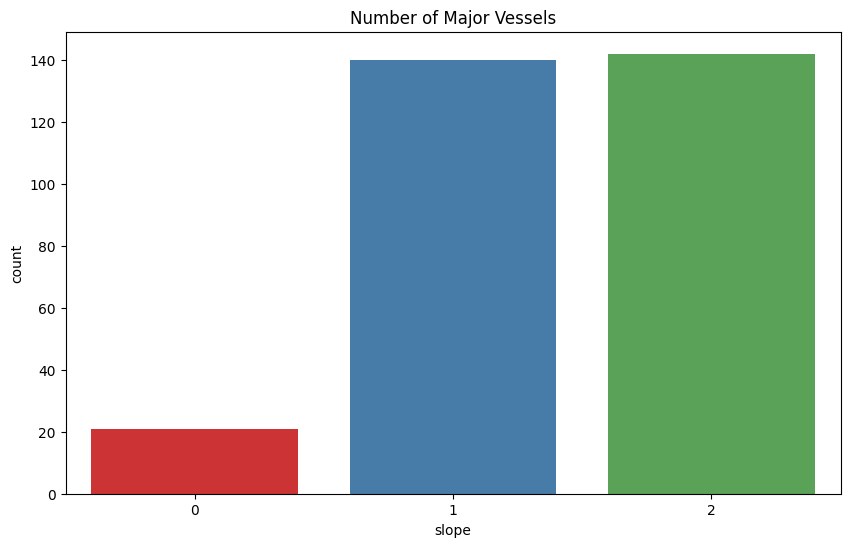

In [29]:
df['slope'].value_counts()

# plot
plt.figure(figsize=(10,6))
sns.countplot(x='slope',data=df, palette='Set1')
plt.title('Number of Major Vessels')

Text(0.5, 1.0, 'Number of Major Vessels')

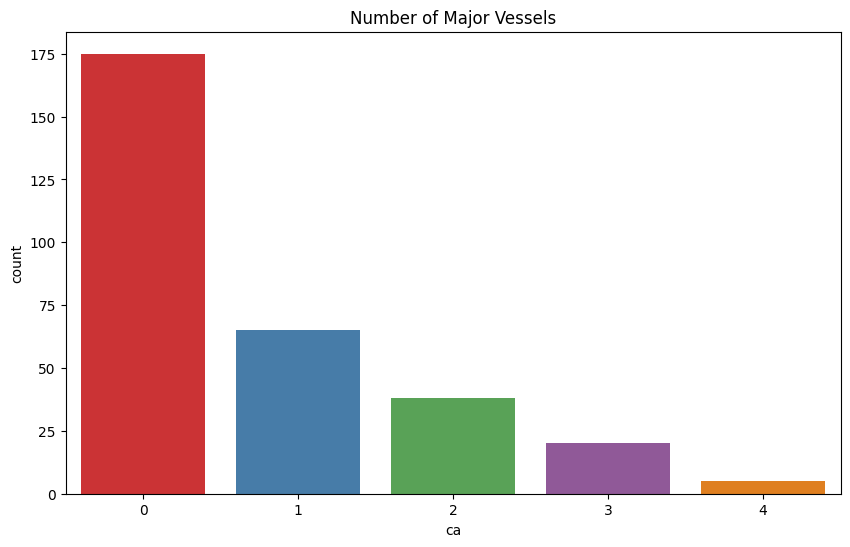

In [30]:
df['ca'].value_counts()

# plot
plt.figure(figsize=(10,6))
sns.countplot(x='ca',data=df, palette='Set1')
plt.title('Number of Major Vessels')

Text(0.5, 1.0, 'Thal')

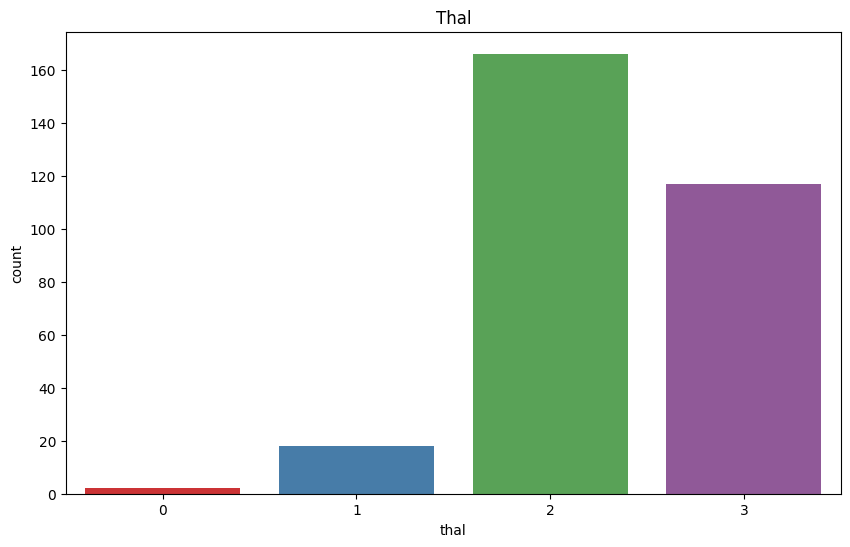

In [32]:
df['thal'].value_counts()

# plot
plt.figure(figsize=(10,6))
sns.countplot(x='thal',data=df, palette='Set1')
plt.title('Thal')

#### Data Cleaning and Preprocessing

Checking for null values

In [41]:
null = df.isnull().sum().sum()
print('There is {} null values in the Data Frame'.format(null))

There is 0 null values in the Data Frame


Unique values for each columns

In [42]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Target class

<Axes: xlabel='target', ylabel='count'>

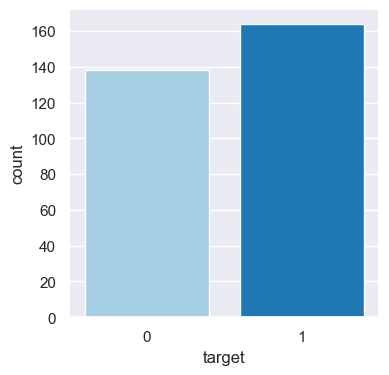

In [43]:
sns.set_style("dark")
sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(x="target", data=df, palette=sns.color_palette("Paired", 7), saturation=10)

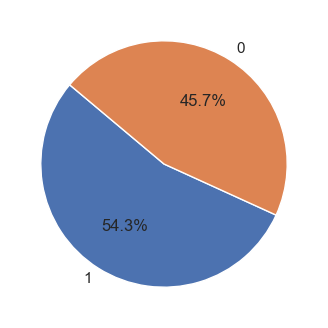

In [45]:
# Count the number of occurrences for each label
label_counts = df['target'].value_counts()

# Create a bar chart
plt.figure(figsize=(4,4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
#plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#plt.title('Distribution of Negative (0) and Positive (1)')
plt.show()

This dataset isn't balanced. 

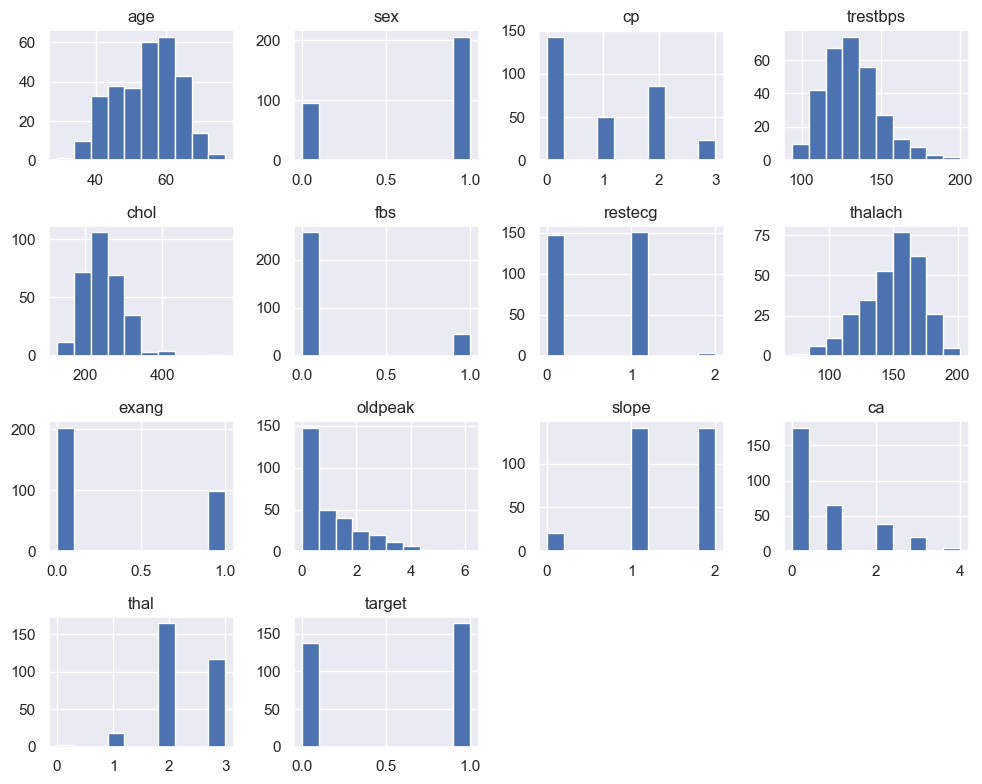

In [46]:
#plt.figure(figsize=(20,6))
ax = df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

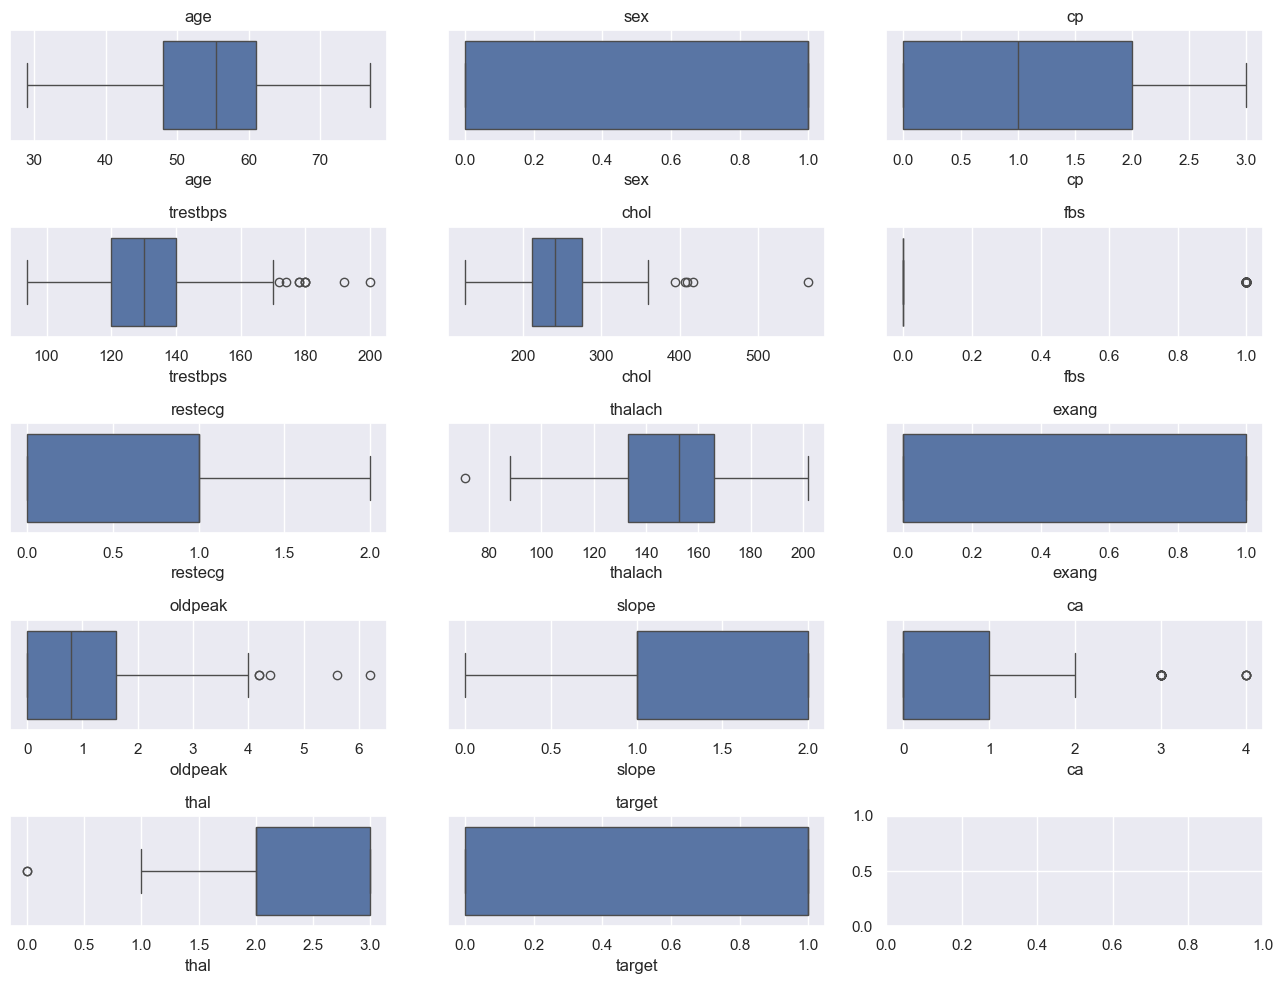

In [47]:
dfcols = df.columns
inputs = list(dfcols)
# Determine the number of logging curves
num_inputs = len(inputs)
# Create a figure with 1 row, and num_inputs long
fig, axs = plt.subplots(5, 3, figsize=(13,10))
# Use a for loop to loop over each column in the dataframe and 
# create a separate box plot
for i, (ax, curve) in enumerate(zip(axs.flat, inputs)):
    sns.boxplot(x=df[curve], ax=ax) 
    ax.set_title(inputs[i])
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

#### OUTLIERS

Detecting outliers using Z-scores method

In [50]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
num_cols_outliers = []
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    sample_outliers = detect_outliers_zscore(df[col])
    print('Column: ', col, '; Outliers: ', len(sample_outliers))
    if len(sample_outliers)>0:
        num_cols_outliers.append(col)

Column:  age ; Outliers:  0
Column:  sex ; Outliers:  0
Column:  cp ; Outliers:  0
Column:  trestbps ; Outliers:  2
Column:  chol ; Outliers:  4
Column:  fbs ; Outliers:  0
Column:  restecg ; Outliers:  0
Column:  thalach ; Outliers:  1
Column:  exang ; Outliers:  0
Column:  oldpeak ; Outliers:  2
Column:  slope ; Outliers:  0
Column:  ca ; Outliers:  4
Column:  thal ; Outliers:  2
Column:  target ; Outliers:  0


Remove Outliers using Winsorize method

In [52]:
for col in num_cols_outliers:
    df[col] = winsorize(df[col],limits = [0.10, 0.10], inplace = True)

Cheking of the elimination of outliers

In [53]:
num_cols_outliers = []
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in num_cols:
    sample_outliers = detect_outliers_zscore(df[col])
    print('Column: ', col, '; Outliers: ', len(sample_outliers))
    if len(sample_outliers)>0:
        num_cols_outliers.append(col)

Column:  age ; Outliers:  0
Column:  sex ; Outliers:  0
Column:  cp ; Outliers:  0
Column:  trestbps ; Outliers:  0
Column:  chol ; Outliers:  0
Column:  fbs ; Outliers:  0
Column:  restecg ; Outliers:  0
Column:  thalach ; Outliers:  0
Column:  exang ; Outliers:  0
Column:  oldpeak ; Outliers:  0
Column:  slope ; Outliers:  0
Column:  ca ; Outliers:  0
Column:  thal ; Outliers:  0
Column:  target ; Outliers:  0


Correlation Inspection

<Axes: >

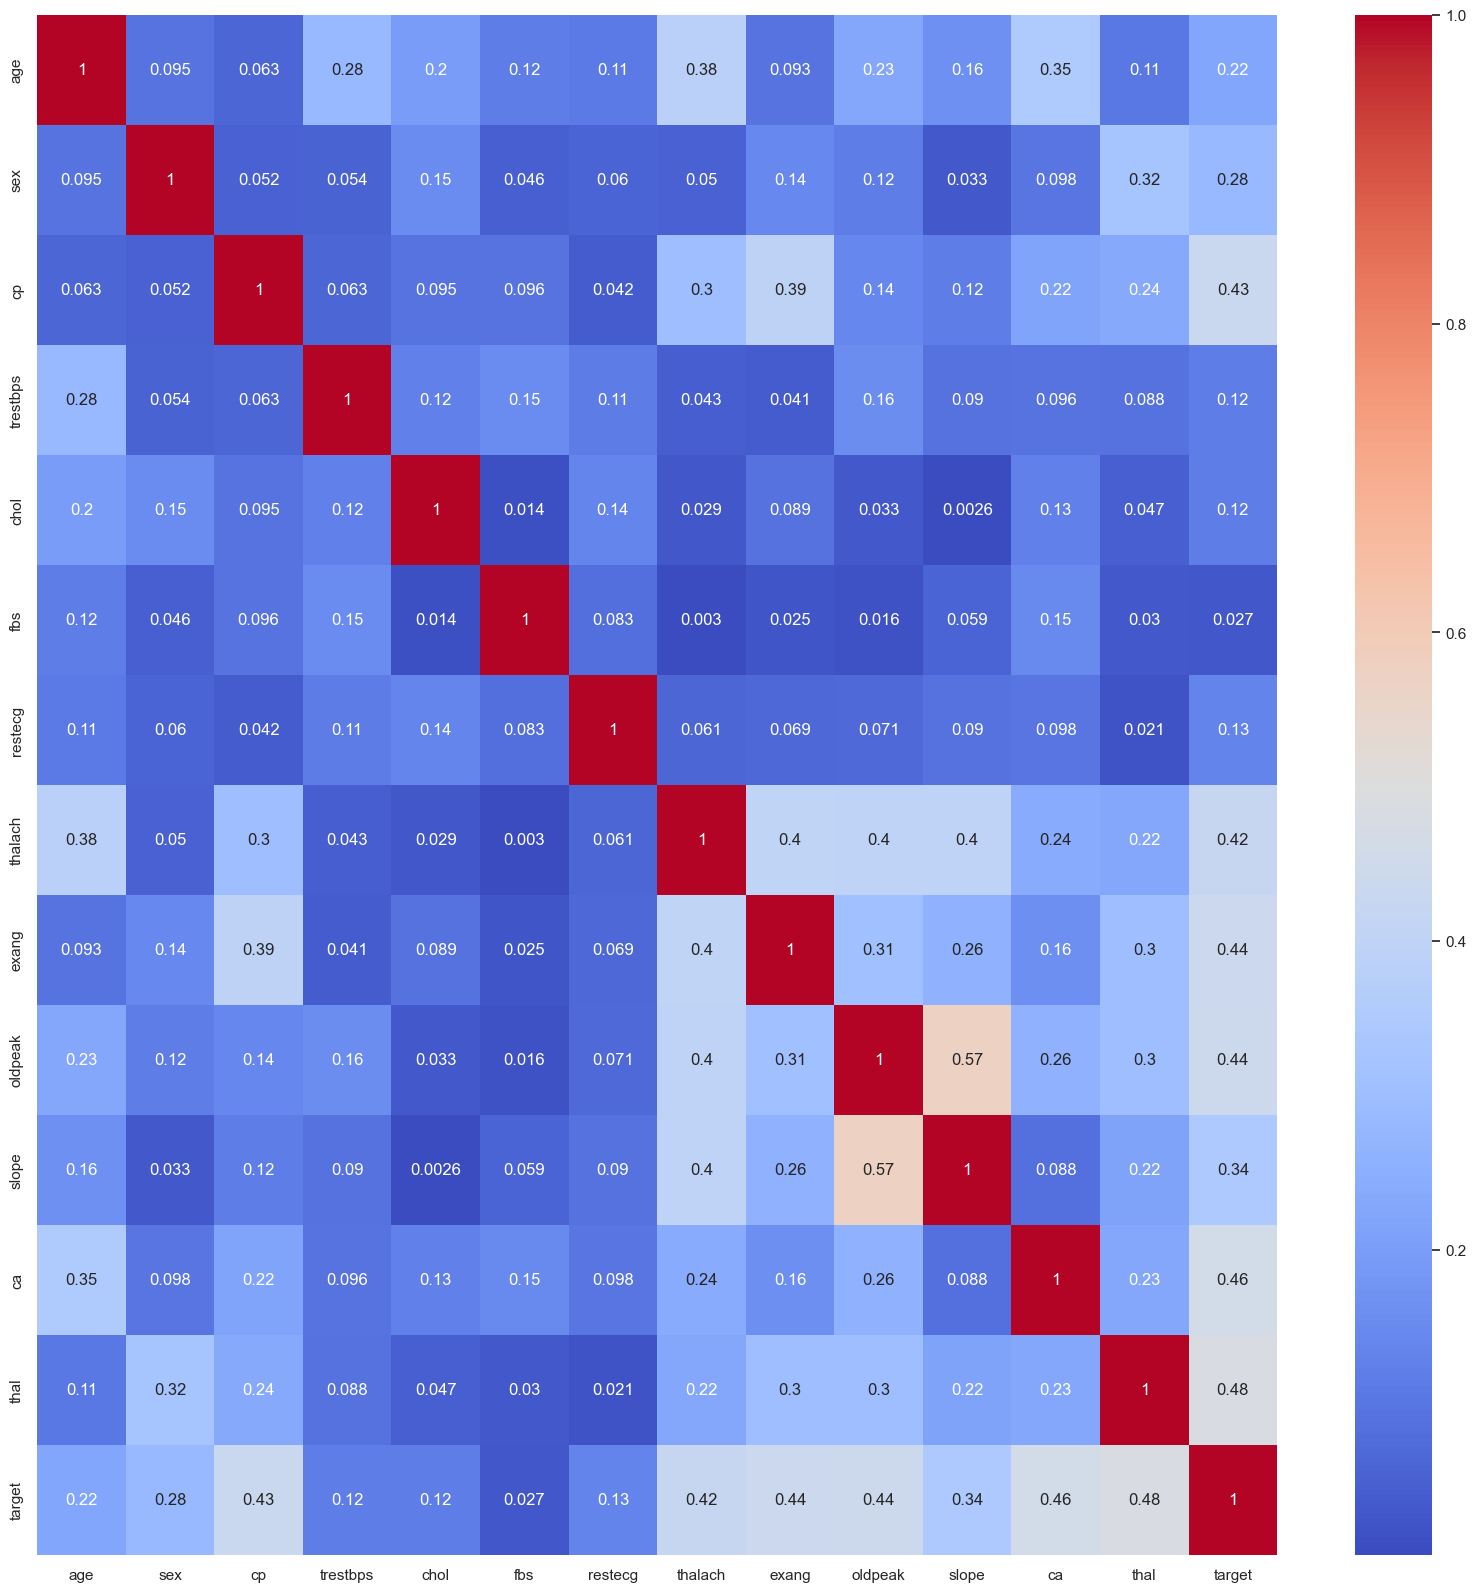

In [54]:
fig, ax = plt.subplots(figsize=(20,20)) 
full_corr_matrix = df.corr().abs()
sns.heatmap(full_corr_matrix, annot=True, cmap='coolwarm')

In [55]:
corr_matrix = df.corr()['target'].abs()
print(corr_matrix.sort_values(ascending=False))

target      1.000000
thal        0.484887
ca          0.460567
oldpeak     0.440475
exang       0.435601
cp          0.432080
thalach     0.421406
slope       0.343940
sex         0.283609
age         0.221476
restecg     0.134874
chol        0.118071
trestbps    0.116250
fbs         0.026826
Name: target, dtype: float64


Split the dataset into features and target variable

In [56]:
X = df.drop("target", axis=1)
y = df["target"]
print(X.shape)
print(y.shape)

(302, 13)
(302,)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state =42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(241, 13) (241,)
(61, 13) (61,)


#### Model Selection

In [60]:
models=[KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(), XGBClassifier()]
model_names=['KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','XGBClassifier']
acc_score=[]
for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc_score.append(accuracy_score(pred,y_test))  
d={'Models':model_names,'Accuracy':acc_score}
acc_table=pd.DataFrame(d)
print(acc_table)

                       Models  Accuracy
0           KNearestNeighbors  0.688525
1      RandomForestClassifier  0.852459
2                DecisionTree  0.754098
3  GradientBoostingClassifier  0.836066
4               XGBClassifier  0.819672


The best models are:
 
1. RandomForestClassifier
2. GradientBoostingClassifier
3. XGBClassifier